<a href="https://colab.research.google.com/github/Danika1808/Poisk910/blob/main/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

bugurt_posts = pd.read_csv('/content/bugurt_thread.csv')
bugurt_posts.head()

,date,text
0,2023-03-27,ЧТО БЫЛО ПРИ ДУРОВЕ. ЧТО МЫ ПОТЕРЯЛИ. \n \n1. ...
1,2023-04-14,*СОЗДАЁТСЯ КАНАЛ В ТГ/БЕСЕДА В ВК КОЛЛЕКТИВА/К...
2,2023-04-14,ТЫ - УЧЕНЫЙ ИЗ ЛЮБОЙ СТРАНЫ\n@\nВЫВЕЛ НОВОЕ ЛО...
3,2023-04-14,"АЛЛО, ПРИЁМНАЯ? \n@\nДА\n@\nСОЧУВСТВУЮ"
4,2023-04-14,ТЫ СЫЧ 20 ЛВЛ \n@ \nУ ТЕБЯ НЕТ ДРУЗЕЙ ИРЛ \n@ ...


In [ ]:
azn_posts = pd.read_csv('/content/priznanya_azn.csv')
azn_posts.head()

,date,text
0,2023-04-14,сами себя не похвалите - никто не похвалит.)\n...
1,2023-04-14,"анон пожалуйста.\nсегодня в гапне, был один па..."
2,2023-04-14,Анон\nhttps://vk.com/azalia_0647\nОчень милая ...
3,2023-04-14,Анон\nДевочки из тумутука такие хорошенькие\nУ...
4,2023-04-14,анон. когда ветер успокоиться уже? 😭


In [ ]:
bugurt_posts['target'] = 'bugurt'
azn_posts['target'] = 'azn'
posts = pd.concat([azn_posts, bugurt_posts])
posts = posts.reset_index(drop=True)
posts.head()

,date,text,target
0,2023-04-14,сами себя не похвалите - никто не похвалит.)\n...,azn
1,2023-04-14,"анон пожалуйста.\nсегодня в гапне, был один па...",azn
2,2023-04-14,Анон\nhttps://vk.com/azalia_0647\nОчень милая ...,azn
3,2023-04-14,Анон\nДевочки из тумутука такие хорошенькие\nУ...,azn
4,2023-04-14,анон. когда ветер успокоиться уже? 😭,azn


# Предобработка данных

## Удаление emoji

In [ ]:
import re

regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

posts['text'] = posts['text'].apply(lambda x: regrex_pattern.sub(r'', x))
posts.head()

,date,text,target
0,2023-04-14,сами себя не похвалите - никто не похвалит.)\n...,azn
1,2023-04-14,"анон пожалуйста.\nсегодня в гапне, был один па...",azn
2,2023-04-14,Анон\nhttps://vk.com/azalia_0647\nОчень милая ...,azn
3,2023-04-14,Анон\nДевочки из тумутука такие хорошенькие\nУ...,azn
4,2023-04-14,анон. когда ветер успокоиться уже?,azn


## Удаление вспомогательных символов

In [ ]:
posts['text'] = posts['text'].apply(lambda x: x.replace('\n', ' '))
posts['text'] = posts['text'].apply(lambda x: x.replace('\t', ' '))
posts['text'] = posts['text'].apply(lambda x: x.replace('\r', ' '))
posts['text'] = posts['text'].apply(lambda x: x.replace('  ', ' '))
posts.head()

,date,text,target
0,2023-04-14,сами себя не похвалите - никто не похвалит.) а...,azn
1,2023-04-14,"анон пожалуйста. сегодня в гапне, был один пар...",azn
2,2023-04-14,Анон https://vk.com/azalia_0647 Очень милая де...,azn
3,2023-04-14,Анон Девочки из тумутука такие хорошенькие Умн...,azn
4,2023-04-14,анон. когда ветер успокоиться уже?,azn


## Удаление пунктуации

In [ ]:
import string

posts['text'] = posts['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
posts['text'] = posts['text'].apply(lambda x: x.translate(str.maketrans('', '', '«»-—')))
posts['text'] = posts['text'].apply(lambda x: x.replace('  ', ' '))
posts.head()

,date,text,target
0,2023-04-14,сами себя не похвалите никто не похвалит анон,azn
1,2023-04-14,анон пожалуйста сегодня в гапне был один парен...,azn
2,2023-04-14,Анон httpsvkcomazalia0647 Очень милая делает в...,azn
3,2023-04-14,Анон Девочки из тумутука такие хорошенькие Умн...,azn
4,2023-04-14,анон когда ветер успокоиться уже,azn


## Приведение к нижнему регистру

In [ ]:
posts['text'] = posts['text'].apply(lambda x: x.lower())
posts.head()

,date,text,target
0,2023-04-14,сами себя не похвалите никто не похвалит анон,azn
1,2023-04-14,анон пожалуйста сегодня в гапне был один парен...,azn
2,2023-04-14,анон httpsvkcomazalia0647 очень милая делает в...,azn
3,2023-04-14,анон девочки из тумутука такие хорошенькие умн...,azn
4,2023-04-14,анон когда ветер успокоиться уже,azn


## Токенизация

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

corpus = {}
for i in range(len(posts)):
    corpus[i] = {
        'text': word_tokenize(posts['text'][i]),
        'target': posts['target'][i]
    }

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Лемматизация

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=6351d8d00a94114a8ae8034f8fc73a7d9d06b5c130fece91bbfef31cf52c7d27
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def lemmatize(text):
    return [morph.parse(word)[0].normal_form for word in text]

for i, post in corpus.items():
    corpus[i]['text'] = lemmatize(post['text'])

## Удаление стоп-слов

Найдем стоп-слова по частоте встречаемости

In [ ]:
word_count = {}
total_words = 0
for i, post in corpus.items():
    for word in post['text']:
        word_count[word] = word_count.get(word, 0) + 1
        total_words += 1

total_words, len(word_count)

(250987, 28871)

In [ ]:
min_threshold = 0.00001
max_threshold = 0.99999

stop_words = []

for word, count in word_count.items():
    freq = count / total_words
    if freq < min_threshold or freq > max_threshold:
        stop_words.append(word)

stop_words[:20], len(stop_words)

(['гапенить',
  'светленький',
  'темносиний',
  'темноватый',
  'ганг',
  'httpsvkcomazalia0647',
  'хорошенький',
  'достойно',
  'хиджаб',
  'тумутуксегодний',
  'девочекдевочкива',
  'молодцыдоказать',
  'mommyдостойно',
  'сыгралидостойный',
  'местосамай',
  'искренять',
  'болельщик',
  'тумутка',
  'фактболельщик',
  'молодцывидночтый'],
 19640)

In [ ]:
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

for i, post in corpus.items():
    corpus[i]['text'] = remove_stop_words(post['text'])

In [ ]:
corpus[0]

{'text': ['сам',
  'себя',
  'не',
  'похвалить',
  'никто',
  'не',
  'похвалить',
  'анон'],
 'target': 'azn'}

## Сохранение предобработанных данных

In [ ]:
corpus_df = pd.DataFrame(corpus).T
corpus_df.head()

,text,target
0,"[сам, себя, не, похвалить, никто, не, похвалит...",azn
1,"[анон, пожалуйста, сегодня, в, быть, один, пар...",azn
2,"[анон, очень, милый, делать, весь, комплимент,...",azn
3,"[анон, девочка, из, тумутук, такой, умница, по...",azn
4,"[анон, когда, ветер, успокоиться, уже]",azn


In [ ]:
corpus_df.to_csv('corpus.csv', index=False)

# Наивный байесовский классификатор

## Разделение данных на обучающую и тестовую выборки

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = corpus_df['text']
y = corpus_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3316,), (830,), (3316,), (830,))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

concat_train = np.concatenate((X_train.reshape(-1, 1), y_train.reshape(-1, 1)), axis=1)
concat_test = np.concatenate((X_test.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)
concat_train[:5]

array([[list(['анонимно', 'переходить', 'в', '4', 'школа', 'как', 'у', 'вы', 'там', 'с', 'там', 'что', 'нет', 'какой', 'у', 'вы', 'там', 'мальчик']),
        'azn'],
       [list(['анон', 'из', '3', 'шк', 'класс']), 'azn'],
       [list(['работать', '1', 'день', 'в', 'с', 'напарник', 'тихо', 'мирно', 'ехать', 'и', 'тут', 'начинаться', 'стрельба', 'твой', 'который', 'работать', '50', 'год', 'в', 'этот', 'сфера', 'абсолютно', 'зачеркнуть', 'на', 'пуля', 'и', 'он', 'как', 'охранник', 'персона', 'давить', 'газ', 'в', 'пол', 'напарник', 'доставать', 'но', 'поскольку', 'не', 'навык', 'оружие', 'че', 'делать', 'с', 'это', 'предмет', 'не', 'знать', 'с', 'лицо', 'лягуха', 'ехать', 'как', 'после', 'прохождение', 'миссия', 'в', 'май']),
        'bugurt'],
       [list(['анон', 'есть', 'ли', 'у', 'он', 'девушка', 'анон']),
        'azn'],
       [list(['играть', 'в', 'пьяница', 'уже', '30', 'год', 'подряд', 'не', 'доиграть']),
        'bugurt']], dtype=object)

## Обучение классификатора

In [ ]:
import numpy as np
import joblib

class Naive_bayes():

    def __init__(self):
        self.classes_cnt = {} # class_num: [dataset_class_counter, total_features_in_class_counter]
        self.freq = {}        # (feature, class_num): counter
        self.unique = set()   # unique features in dataset
        self.fitted = False

    def fit(self, dataset):
        for features, label in dataset:
            if label not in self.classes_cnt:
                self.classes_cnt[label] = [0, 0]
            self.classes_cnt[label][0] += 1
            for feature in features:
                if (feature, label) not in self.freq:
                    self.freq[(feature, label)] = 0
                self.freq[(feature, label)] += 1
                self.classes_cnt[label][1] += 1
                self.unique.add(feature)
        self.fitted = True

    def predict(self, features, alpha=1):
        if not self.fitted: return None
        dataset_cnt = 0
        for label in self.classes_cnt:
            dataset_cnt += self.classes_cnt[label][1]

        max_prob = -1
        max_label = None
        for cls in self.classes_cnt:
            cls_prob = self.classes_cnt[cls][0] / dataset_cnt
            for feature in features:
                if (feature, cls) in self.freq:
                    cls_prob += (self.freq[(feature, cls)] + alpha) / (self.classes_cnt[cls][1] + alpha * len(self.unique))
                else:
                    cls_prob += alpha / (self.classes_cnt[cls][1] + alpha * len(self.unique))
            if cls_prob > max_prob:
                max_prob = cls_prob
                max_label = cls
        return max_label

    def export_model(self, path='dicts.pkl'):
        model = self.classes_cnt, self.freq, self.unique
        joblib.dump(model, 'dicts.pkl')
        return model

    def import_model(self, path='dicts.pkl'):
        self.classes_cnt, self.freq, self.unique = joblib.load(path)
        self.fitted = True

nb = Naive_bayes()
nb.fit(concat_train)
nb.export_model('dicts.pkl')
nb.import_model('dicts.pkl')

for k, item in enumerate(concat_test):
    print(nb.predict(item[0], alpha=1), ' : ', item[1])
    if k == 10: break

bugurt  :  bugurt
azn  :  azn
azn  :  azn
azn  :  azn
azn  :  azn
bugurt  :  bugurt
azn  :  azn
azn  :  azn
bugurt  :  bugurt
bugurt  :  bugurt
azn  :  azn


## Оценка качества классификатора

In [ ]:
y_pred = []
for item in concat_test:
    y_pred.append(nb.predict(item[0], alpha=1))

y_pred = np.array(y_pred)

In [ ]:
# map labels to numbers
y_test = np.array([1 if label == 'skoltech' else 0 for label in y_test])
y_pred = np.array([1 if label == 'skoltech' else 0 for label in y_pred])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1-Score score:', f1_score(y_test, y_pred))

Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1-Score score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


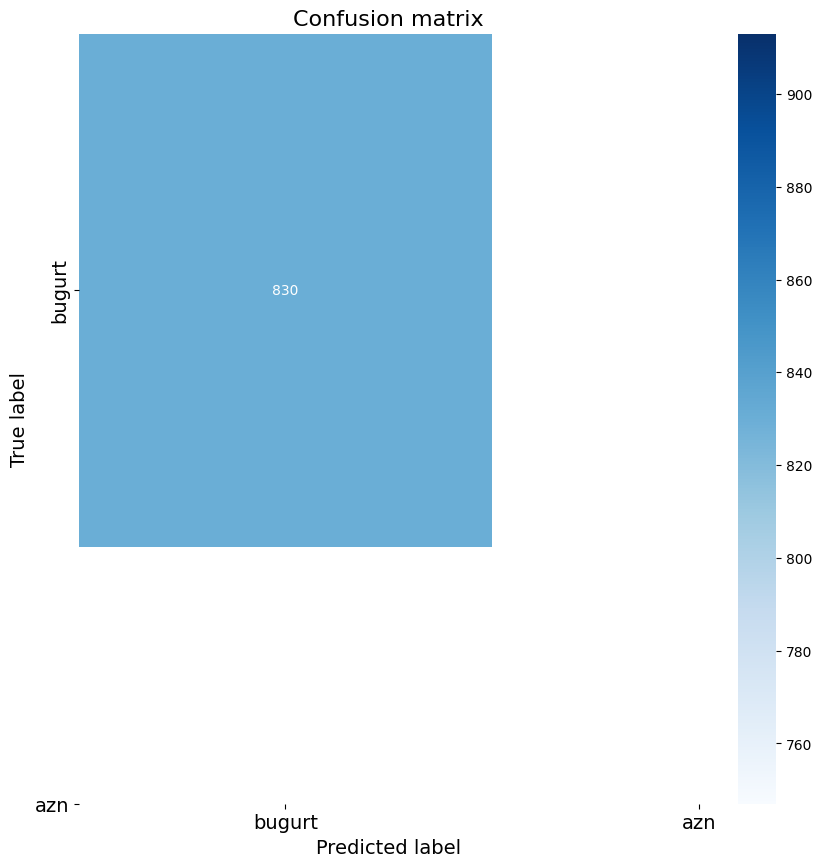

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
# rename ticks
plt.xticks([0.5, 1.5], ['bugurt', 'azn'], fontsize=14)
plt.yticks([0.5, 1.5], ['bugurt', 'azn'], fontsize=14)
plt.show()